In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define paths
train_dir = '/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA'
test_dir = '/kaggle/input/traffic-sign-dataset-classification/traffic_Data/TEST'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



Found 4170 images belonging to 58 classes.


In [10]:
import os
import pandas as pd
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

In [11]:
batch_size = 50
image_height = 150
image_width = 150

In [13]:


training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size= (image_height, image_width),
    batch_size=batch_size
)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (image_height, image_width),
    batch_size=batch_size

)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [16]:
class_name = training_ds.class_names
model = models.Sequential([
layers.Rescaling(1./255, input_shape=(image_height, image_width,3)),
layers.Conv2D(20,3,activation = 'relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(len(class_name), activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

epochs = 20

history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 20)     │         3,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │     1,658,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 58)             │         3,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671,054 (6.37 MB)

 Trainable params: 1,671,054 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 36s 517ms/step - accuracy: 0.1907 - loss: 3.4207 - val_accuracy: 0.5216 - val_loss: 2.0264
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 522ms/step - accuracy: 0.6616 - loss: 1.3813 - val_accuracy: 0.7386 - val_loss: 0.9017
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 522ms/step - accuracy: 0.8305 - loss: 0.6182 - val_accuracy: 0.8273 - val_loss: 0.5257
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 525ms/step - accuracy: 0.9145 - loss: 0.3062 - val_accuracy: 0.9053 - val_loss: 0.3264
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 529ms/step - accuracy: 0.9637 - loss: 0.1429 - val_accuracy: 0.9580 - val_loss: 0.1755
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 521ms/step - accuracy: 0.9820 - loss: 0.0789 - val_accuracy: 0.9508 - val_loss: 0.1577
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 520ms/step - accuracy: 0.9920 - loss: 0.0362 - val_accuracy: 0.9676 - val_loss: 0.1019
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 522ms/step - accuracy: 0.9987 - loss: 0.0143 - val_accu

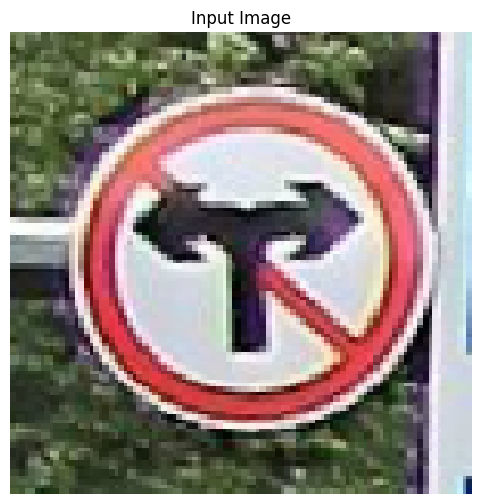

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Traffic Sign: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


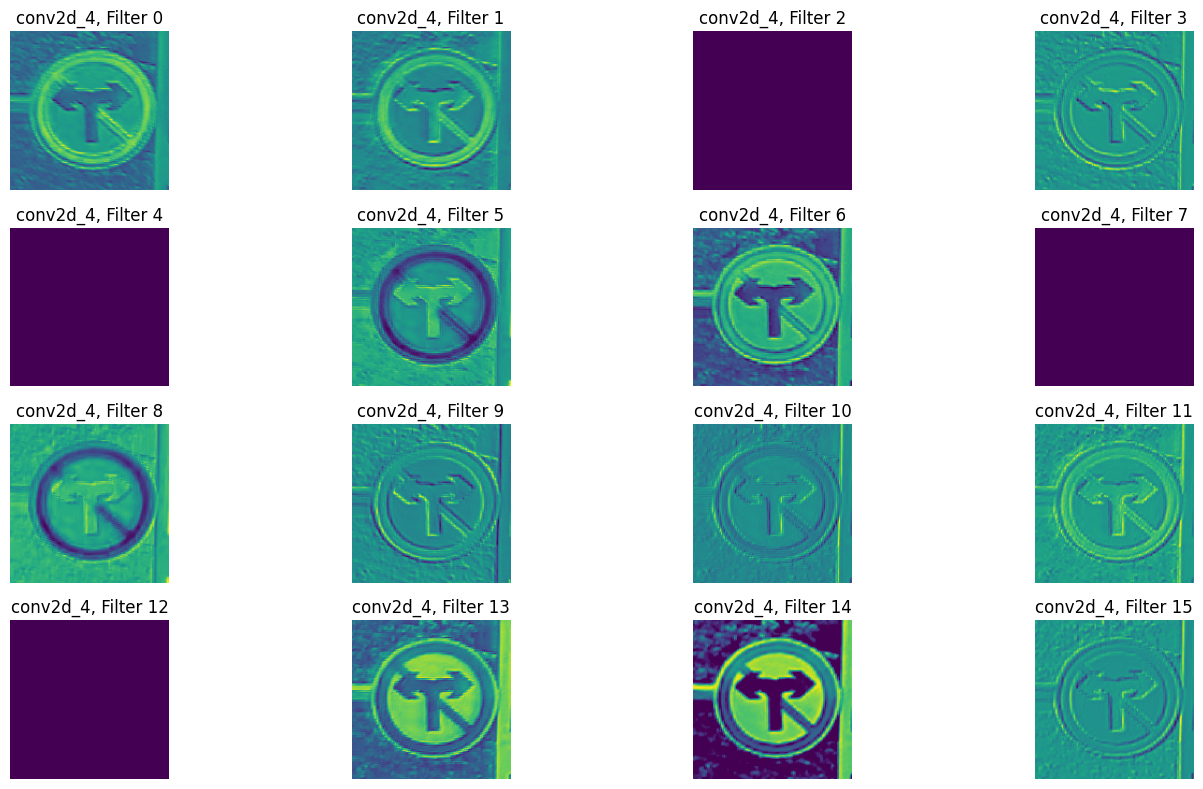

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


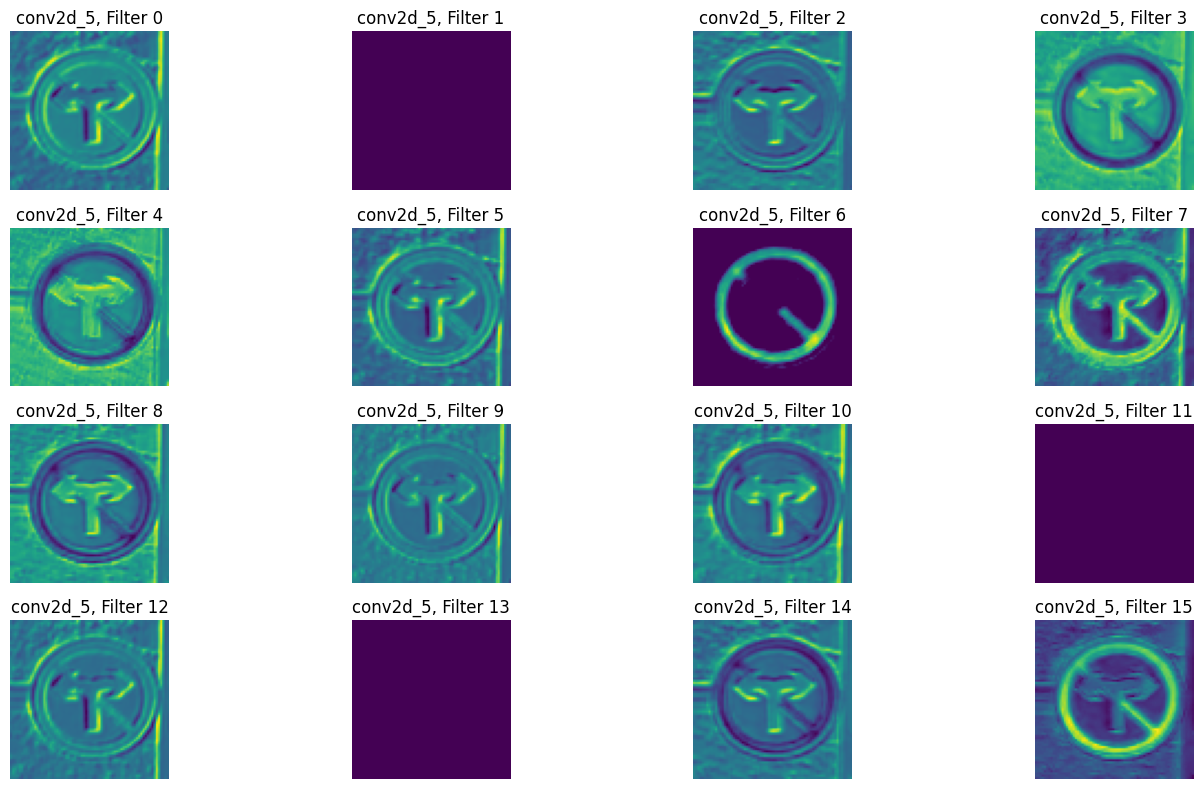

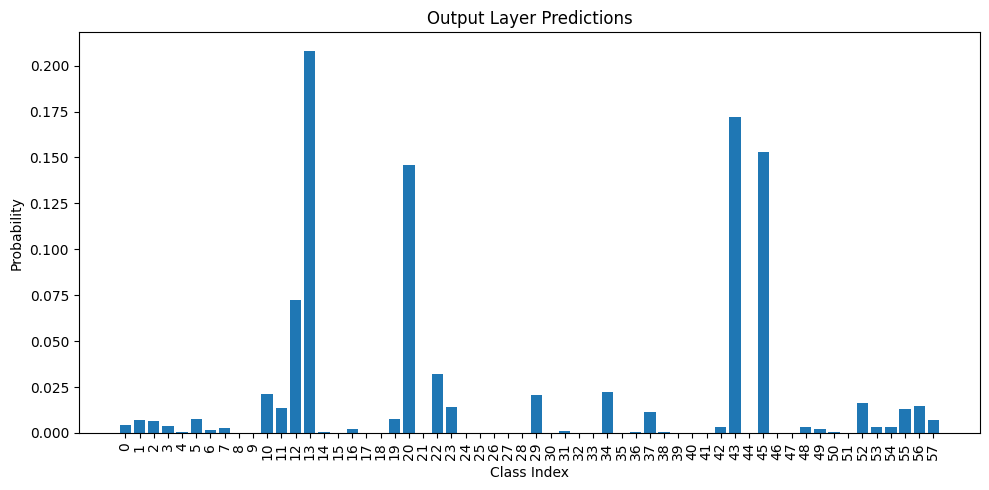

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_and_visualize_traffic_sign(image_path, model, class_names):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

    # Visualize the input image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    predicted_sign = class_names[predicted_class]
    print("Predicted Traffic Sign:", predicted_sign)

    # Visualize feature maps
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            # Create a new model that outputs the current layer's activations
            temp_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer.output)
            activations = temp_model.predict(img_array)

            # Plot feature maps
            plt.figure(figsize=(15, 8))
            for i in range(min(16, activations.shape[-1])):  # Display up to 16 feature maps
                plt.subplot(4, 4, i+1)
                plt.imshow(activations[0, :, :, i], cmap='viridis')
                plt.title(f'{layer.name}, Filter {i}')
                plt.axis('off')
            plt.tight_layout()
            plt.show()

    # Visualize output layer
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(class_names)), predictions[0])
    plt.title("Output Layer Predictions")
    plt.xlabel("Class Index")
    plt.ylabel("Probability")
    plt.xticks(range(len(class_names)), range(len(class_names)), rotation=90)
    plt.tight_layout()
    plt.show()

    return predicted_sign

# Example usage
image_path = train_dir+'/12/012_0004.png'
predicted_sign = predict_and_visualize_traffic_sign(image_path, model, class_name)